# Анализ продаж компьютерных игр

# Описание проекта

Интернет-магазин по продаже компьютерных игр имеет данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation).<br>

<b>Цель исследования</b><br>

Определить сложившиеся на рынке закономерностии выявить потенциально популярный продукт для планирования рекламной кампании.<br>

<b>Описание данных</b><br>

Name — название игры<br>
Platform — платформа<br>
Year_of_Release — год выпуска<br>
Genre — жанр игры<br>
NA_sales — продажи в Северной Америке (миллионы проданных копий)<br>
EU_sales — продажи в Европе (миллионы проданных копий)<br>
JP_sales — продажи в Японии (миллионы проданных копий)<br>
Other_sales — продажи в других странах (миллионы проданных копий)<br>
Critic_Score — оценка критиков (максимум 100)<br>
User_Score — оценка пользователей (максимум 10)<br>
Rating — рейтинг от организации ESRB. Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.


<b>Ход исследования</b><br>

Подготовка данных: загрузка данных и изучение общей информации.<br>
Предобработка данных: работа с пропусками, корректировка типа данных, дубликатов и других аномалий.<br>
Расширение набора данных: добавление новых столбцов.<br>
Исследовательский анализ данных: изучение основных параметров, их распределения, зависимости объема продаж от разных параметров, выявление и обработка аномалий при их выявлении. 

<b>Общий вывод:</b> резюмирование полученных выводов.

## Загрузка данных

In [1]:
#импортируем библиотеки
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

In [2]:
#Загружаем данные из csv-файла в датафрейм
df = pd.read_csv('/datasets/games.csv')
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Данные содержат 16715 строк. Есть пропущенные значения в столбцах 'Name', 'Year_of_Release','Genre','Critic_Score', 'User_Score', 'Rating'.<br>
Необходимо изменить типы данных в столбцах:<br>
year_of_release - заменить на int8 (год выпуска - целое число);<br>
user_score - на float64.

## Предобработка данных

### Форматирование названий столбцов

In [4]:
#названия столбцов приведем к нижнему регистру
df.columns = df.columns.str.lower()
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### Работа с пропусками и типами данных

In [5]:
#выведем количество пропущенных значений в каждом столбце
df.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [6]:
#найдем пропущенные значения в названиях игр
df[df['name'].isna()==True]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


В двух строках пропущены названия игры на платформе GEN 1993 года выпуска. Здесь же пропущены значения по столбцу 'genre'.
Определить про какие игры идет речь мы не сможем. Удалим их.

In [7]:
df = df.dropna(subset=['name'])

In [8]:
#посмотрим для каких платформ и игр пропущен год выпуска
df.loc[df['year_of_release'].isna()==True]['name'].value_counts()

LEGO Harry Potter: Years 5-7                     7
Rock Band                                        4
Happy Feet Two                                   4
WRC: FIA World Rally Championship                3
Test Drive Unlimited 2                           3
                                                ..
Ghostbusters II                                  1
Tom and Jerry in War of the Whiskers             1
Clockwork Empires                                1
The King of Fighters: Maximum Impact - Maniax    1
Luxor: Pharaoh's Challenge                       1
Name: name, Length: 232, dtype: int64

In [9]:
df.loc[df['year_of_release'].isna()==True]['platform'].value_counts()

Wii     34
PS2     34
X360    30
DS      30
PS3     25
XB      21
PC      17
2600    17
PSP     16
GC      14
GBA     11
3DS      8
PS       7
N64      3
GB       1
PSV      1
Name: platform, dtype: int64

Год выпуска игры пропущен в 269 строках по разным играм (232 шт.) на разных платформах (12 шт.) и составляет 1,6% данных. <br>
Пропуски не относятся к каким-то конкретным платформам или играм. Скорее всего в источниках, из которых собирали данные, не было этих данных. Удалим эти строки. 


In [10]:
df = df.dropna(subset=['year_of_release'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


Теперь можем заменить тип данных в 'year_of_release'

In [11]:
df['year_of_release'] = df['year_of_release'].astype('int')

In [12]:
#посмотрим на уникальные значения оценок пользователей
df['user_score'].sort_values().unique()

array(['0', '0.2', '0.3', '0.5', '0.6', '0.7', '0.9', '1', '1.1', '1.2',
       '1.3', '1.4', '1.5', '1.6', '1.7', '1.8', '1.9', '2', '2.1', '2.2',
       '2.3', '2.4', '2.5', '2.6', '2.7', '2.8', '2.9', '3', '3.1', '3.2',
       '3.3', '3.4', '3.5', '3.6', '3.7', '3.8', '3.9', '4', '4.1', '4.2',
       '4.3', '4.4', '4.5', '4.6', '4.7', '4.8', '4.9', '5', '5.1', '5.2',
       '5.3', '5.4', '5.5', '5.6', '5.7', '5.8', '5.9', '6', '6.1', '6.2',
       '6.3', '6.4', '6.5', '6.6', '6.7', '6.8', '6.9', '7', '7.1', '7.2',
       '7.3', '7.4', '7.5', '7.6', '7.7', '7.8', '7.9', '8', '8.1', '8.2',
       '8.3', '8.4', '8.5', '8.6', '8.7', '8.8', '8.9', '9', '9.1', '9.2',
       '9.3', '9.4', '9.5', '9.6', '9.7', 'tbd', nan], dtype=object)

Помимо пустых значений, в данных встречаются строки с аббревиатурой 'tbd'. Аббревиатура tbd (To Be Determined (будет определено)) используется, если какая-то информация еще не определена. Причина их отсутствия скорее всего заключается в отсутствии данных в источнике информации.<br>
Используем метод to_numeric с параметром 'coerce'. Тем самым заменим 'tbd' на NaN и изменим тип данных на float.

In [13]:
df['user_score'] = pd.to_numeric(df['user_score'],'coerce')
df['user_score'].sort_values().unique()

array([0. , 0.2, 0.3, 0.5, 0.6, 0.7, 0.9, 1. , 1.1, 1.2, 1.3, 1.4, 1.5,
       1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8,
       2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4. , 4.1,
       4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1, 5.2, 5.3, 5.4,
       5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4, 6.5, 6.6, 6.7,
       6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8, 7.9, 8. ,
       8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9. , 9.1, 9.2, 9.3,
       9.4, 9.5, 9.6, 9.7, nan])

In [14]:
df['user_score'].isna().sum()

8981

После преобразований видим, что более половины данных об оценке пользователей не указано. Удалить эти значения мы не можем, т.к. потеряем много данных. Заменить на среднее или медиану будет некорректным и может привести к искажению результатов, так как рейтинг зависит от конкретной игры на конкретной платформе. Оставим пропуски как есть.

In [15]:
#посмотрим на уникальные значения в оценках критиков
df['critic_score'].sort_values().unique()

array([13., 17., 19., 20., 21., 23., 24., 25., 26., 27., 28., 29., 30.,
       31., 32., 33., 34., 35., 36., 37., 38., 39., 40., 41., 42., 43.,
       44., 45., 46., 47., 48., 49., 50., 51., 52., 53., 54., 55., 56.,
       57., 58., 59., 60., 61., 62., 63., 64., 65., 66., 67., 68., 69.,
       70., 71., 72., 73., 74., 75., 76., 77., 78., 79., 80., 81., 82.,
       83., 84., 85., 86., 87., 88., 89., 90., 91., 92., 93., 94., 95.,
       96., 97., 98., nan])

Пропуски в данных об оценке критиков также содержатся более, чем в половине данных. Оставим их как есть.

In [16]:
df['rating'].isna().sum()

6676

In [17]:
#посмотрим на уникальные значения возрастных рейтингов игр
df['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Информация о возрастной категории игры содержит 6676 пропусков. Данная переменная является категориальной, заменим пропуски на 'unknown'.

In [18]:
df['rating'] = df['rating'].fillna('unknown')

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


В результате работы с пропусками было удалено 271 строка. Пропуски в значениях оценок критиков и пользователь игр оставили как есть, во избежании искажения данных.

### Работа с дубликатами

#### Поиск явных дубликатов

In [20]:
#проверка на наличие дубликатов
df.duplicated().sum()

0

Полностью дублирующихся строк не обнаружено. Однако, могут быть строки с одной и той же игрой, но данные о продажа разбиты по строкам. Проверим это.

In [21]:
#проверка на наличие дубликатов без учета столбцов с рейтингами и данными о продажах
df[['name','platform','year_of_release','genre']].duplicated().sum()

1

In [22]:
df[df[['name','platform','year_of_release','genre']].duplicated()==True]
dupli = df.loc[df[['name','platform','year_of_release','genre']].duplicated()==True,['name','platform','year_of_release','genre']]
dupli

,name,platform,year_of_release,genre
16230,Madden NFL 13,PS3,2012,Sports


In [23]:
df[(df['name'] == 'Madden NFL 13')&(df['platform'] == 'PS3')&(df['year_of_release'] == 2012)&(df['genre'] == 'Sports')]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,2012,Sports,2.11,0.22,0.0,0.23,83.0,5.5,E
16230,Madden NFL 13,PS3,2012,Sports,0.00,0.01,0.0,0.00,83.0,5.5,E


Дубликат не содержит дополнительной информации в столбцах, которые мы не учитывали при поиске совпадений. Можем смело его удалить.

In [24]:
df = df.drop_duplicates(['name','platform','year_of_release','genre'])

In [25]:
df[['name','platform','year_of_release','genre']].duplicated().sum()

0

#### Поиск неявных дубликатов

In [26]:
df['rating'].unique()

array(['E', 'unknown', 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'],
      dtype=object)

Рейтинг K-A (подходит для все возрастов) использовался до 1998 года. Сейчас вместо него используется рейтинг E.
Заменим 'K-A' на 'E'.

In [27]:
df.loc[df['rating']=='K-A','rating'] = 'E'
df['rating'].unique()

array(['E', 'unknown', 'M', 'T', 'E10+', 'AO', 'EC', 'RP'], dtype=object)

In [28]:
#посмотрим, какие жанры  представлены в данных
df['genre'].sort_values().unique()

array(['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle',
       'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports',
       'Strategy'], dtype=object)

In [29]:
#посмотрим, какие платформы представлены в данных
df['platform'].sort_values().unique()

array(['2600', '3DO', '3DS', 'DC', 'DS', 'GB', 'GBA', 'GC', 'GEN', 'GG',
       'N64', 'NES', 'NG', 'PC', 'PCFX', 'PS', 'PS2', 'PS3', 'PS4', 'PSP',
       'PSV', 'SAT', 'SCD', 'SNES', 'TG16', 'WS', 'Wii', 'WiiU', 'X360',
       'XB', 'XOne'], dtype=object)

Неявных дубликатов в названии платформ и жанра игр не выявлено.

### Проведение дополнительных расчетов для последующего анализа

In [30]:
#добавим столбец с общим объемом продаж
df['total_sales'] = df['na_sales']+df['eu_sales']+df['jp_sales']+df['other_sales']

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16443 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  int64  
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     7982 non-null   float64
 9   user_score       7462 non-null   float64
 10  rating           16443 non-null  object 
 11  total_sales      16443 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.6+ MB


В результате предварительной обработки данных было удалено 272 строки. Из них 269 по причине наличия пропусков в данных о годе выпуска игры, 2 - с неизвестным названием игры, 1- дубликат.<br>
Изменен тип данных столбцов 'user_score' на float64, year_of_release  на int64.<br>
Пропуски в 'rating' заменили на 'unknown'. <br>
Произведена замена неактуального рейтинга 'K-A' (использовался до 1998 г.) на его современный аналог рейтинг 'E'.<br>
Столбцы с данными по оценке пользователей и критиков содержат больше половины пропусков. Эти пропуски оставили как есть во избежании искажения данных. <br>
Для проведения последующего анализа добавлен столбец 'total_sales', отражающий общий объем продаж игр по всем регионам.<br>

## Исследовательский анализ данных

### Распределение выпуска игр по годам

In [32]:
df['year_of_release'].describe()

count    16443.000000
mean      2006.485921
std          5.875546
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2016.000000
Name: year_of_release, dtype: float64

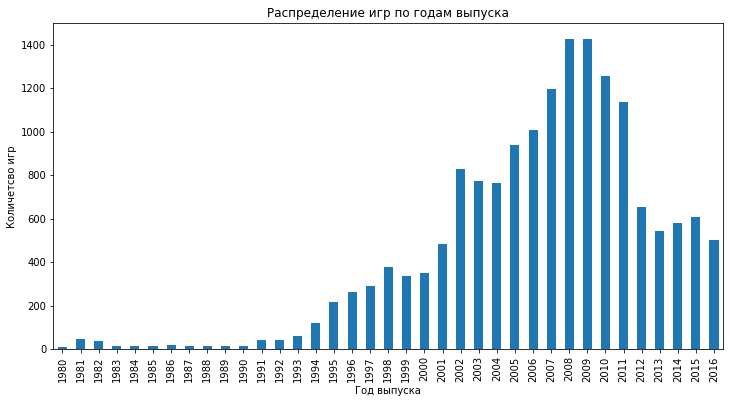

In [33]:
#Посмотрим, сколько игр выпускалось в разные годы
df.groupby('year_of_release')['name'].count().plot(kind='bar', figsize=(12,6))
plt.title('Распределение игр по годам выпуска')
plt.xlabel('Год выпуска')
plt.ylabel('Количетсво игр');

Данные о продажах представлены за период с 1980 по 2016 годы. Основная часть игр выпускалась после 2003 г. Больше всего выпущено игр 2007-2011 годах.

### Распределение продаж по платформам и выбор перспективных платформ

In [34]:
#Посмотрим, как менялись продажи по платформам
(
df.pivot_table(index='platform', values = 'total_sales', aggfunc='sum')
.sort_values(by='total_sales', ascending=False).reset_index().head(10)
)

,platform,total_sales
0,PS2,1233.56
1,X360,961.24
2,PS3,931.33
3,Wii,891.18
4,DS,802.78
5,PS,727.58
6,PS4,314.14
7,GBA,312.88
8,PSP,289.53
9,3DS,257.81


In [35]:
#Выберем первые 6 платформ с наибольшими суммарными продажами
max_sales_platform = (df.pivot_table(index='platform', values = 'total_sales', aggfunc='sum')
.sort_values(by='total_sales', ascending=False).reset_index().loc[0:5,'platform'])
max_sales_platform

0     PS2
1    X360
2     PS3
3     Wii
4      DS
5      PS
Name: platform, dtype: object

Максимальный объем продаж был у игр на платформах PS2, X360, PS3, Wii, DS, PS. 

In [36]:
# посмотрим на распределение продаж платформ по годам
sales_per_year = (df.query('platform in @max_sales_platform')
                  .pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum'))
sales_per_year

platform,DS,PS,PS2,PS3,Wii,X360
year_of_release,,,,,,
1985,0.02,NaN,NaN,NaN,NaN,NaN
1994,NaN,6.03,NaN,NaN,NaN,NaN
1995,NaN,35.96,NaN,NaN,NaN,NaN
1996,NaN,94.70,NaN,NaN,NaN,NaN
1997,NaN,136.17,NaN,NaN,NaN,NaN
1998,NaN,169.49,NaN,NaN,NaN,NaN
1999,NaN,144.53,NaN,NaN,NaN,NaN
2000,NaN,96.37,39.17,NaN,NaN,NaN
2001,NaN,35.59,166.43,NaN,NaN,NaN


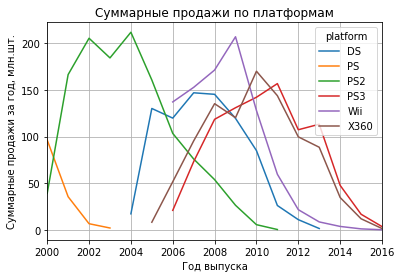

In [37]:
ax=plt.subplot()
sales_per_year.plot(xlim=(2000,2016), grid=True,ax=ax)
plt.title('Суммарные продажи по платформам')
plt.xlabel('Год выпуска')
plt.ylabel('Суммарные продажи за год, млн.шт.');

Из графика видно, что жизненный цикл платформы составляет в около 10 лет. Первые 2-3 года наблюдается активный рост продаж выпускаемых игр, около 4 лет достижение пика и переход в стадию спада. Объем продаж игр, выпущенных в последние годы существования платформы незначителен.
Рассчитаем период жизни платформы (от выпуска первых игр до последнего года выпсука игр на этой этой платформе). 

In [38]:
#рассчитаем период жизни платформы
life_data = df.query('platform in @max_sales_platform and year_of_release>=1994').pivot_table(index='platform', values='year_of_release', aggfunc=(['min','max']))
life_data['life_period']=life_data['max']-life_data['min']
life_data.head()

,min,max,life_period
,year_of_release,year_of_release,
platform,,,
DS,2004,2013,9
PS,1994,2003,9
PS2,2000,2011,11
PS3,2006,2016,10
Wii,2006,2016,10


In [39]:
life_data['life_period'].mean()

10.0

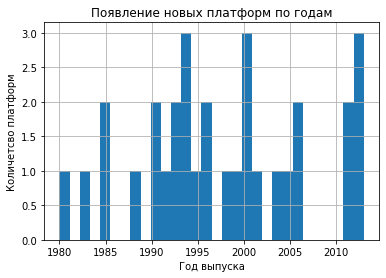

In [40]:
#посмотрим, как часто выходят новые платформы
df.pivot_table(index='platform', values='year_of_release', aggfunc='min').sort_values(by='year_of_release').hist(bins=30)
plt.title('Появление новых платформ по годам')
plt.xlabel('Год выпуска')
plt.ylabel('Количетсво платформ');

По гистограмме видим, что "всплески" выхода новых платформ происходят с периодичностью в 5-6 лет.

Исходя из полученных данных можем предположить, что в 2017 году будут активно продаваться игры на платформах, которые появились в 2013-2014 гг. и пойдут на снижение продажи платформ 2011-2012 года выпуска.<br>
Для дальнейшего анализа будем рассматривать период с 2013 года. Это те платформы, которые в 2017 будут находиться на пике продаж или приближаются к нему.

In [41]:
actual_data = df.query('year_of_release>=2013')
actual_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2233 entries, 16 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             2233 non-null   object 
 1   platform         2233 non-null   object 
 2   year_of_release  2233 non-null   int64  
 3   genre            2233 non-null   object 
 4   na_sales         2233 non-null   float64
 5   eu_sales         2233 non-null   float64
 6   jp_sales         2233 non-null   float64
 7   other_sales      2233 non-null   float64
 8   critic_score     991 non-null    float64
 9   user_score       1192 non-null   float64
 10  rating           2233 non-null   object 
 11  total_sales      2233 non-null   float64
dtypes: float64(7), int64(1), object(4)
memory usage: 226.8+ KB


In [42]:
actual_data.groupby('platform').agg({'total_sales':'sum'}).sort_values(by='total_sales',ascending=False).head(10)

,total_sales
platform,
PS4,314.14
PS3,181.43
XOne,159.32
3DS,143.25
X360,136.80
WiiU,64.63
PC,39.43
PSV,32.99
Wii,13.66


Лидеры продаж: PS4, PS3, XOne, 3DS, X360.

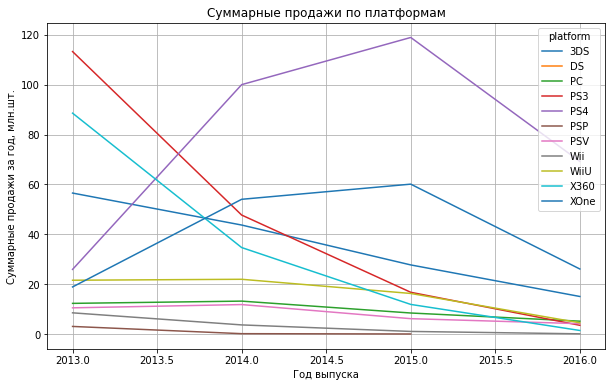

In [43]:
actual_data.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum').plot(grid=True, figsize=(10,6))
plt.title('Суммарные продажи по платформам')
plt.xlabel('Год выпуска')
plt.ylabel('Суммарные продажи за год, млн.шт.');

Наиболее перспективными являются платформы PS4, приходящая на смену популярной PS3, и XOne, которая заменит X360. Обе платформы 2013 года выпуска. Это самые молодые платформы с наибольшим объемом продаж и перспективой остаться на рынке в ТОПе еще 2-3 года. Остальные платформы присутствуют на рынке более 5 лет и имеют тенденцию к падению продаж.

Проанализируем продажи игр для платформ PS4 и XOne 

In [44]:
games = actual_data.query('platform=="PS4" or platform=="XOne"')
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 639 entries, 31 to 16672
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             639 non-null    object 
 1   platform         639 non-null    object 
 2   year_of_release  639 non-null    int64  
 3   genre            639 non-null    object 
 4   na_sales         639 non-null    float64
 5   eu_sales         639 non-null    float64
 6   jp_sales         639 non-null    float64
 7   other_sales      639 non-null    float64
 8   critic_score     421 non-null    float64
 9   user_score       439 non-null    float64
 10  rating           639 non-null    object 
 11  total_sales      639 non-null    float64
dtypes: float64(7), int64(1), object(4)
memory usage: 64.9+ KB


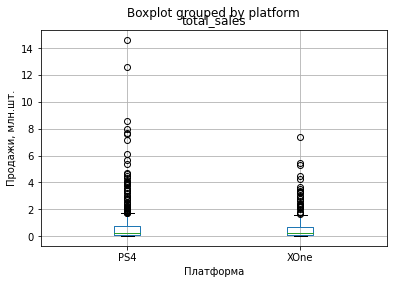

In [45]:
#построим диаграмму размаха по продажа ирг на платформах
games.boxplot(column='total_sales', by='platform')
plt.xlabel('Платформа')
plt.ylabel('Продажи, млн.шт.');

In [46]:
#посмотрим какие игры наиболее популярны
(
games.query('total_sales>5').groupby(['platform','name']).agg({'total_sales':'sum'}).
sort_values(by=['platform','total_sales'], ascending=False)
)

total_sales
platform name                                       
XOne     Call of Duty: Black Ops 3              7.39
         Grand Theft Auto V                     5.47
         Call of Duty: Advanced Warfare         5.26
PS4      Call of Duty: Black Ops 3             14.63
         Grand Theft Auto V                    12.62
         FIFA 16                                8.58
         Star Wars Battlefront (2015)           7.98
         Call of Duty: Advanced Warfare         7.66
         FIFA 17                                7.60
         Fallout 4                              7.17
         FIFA 15                                6.08
         Destiny                                5.64
         Uncharted 4: A Thief's End             5.39

На диаграмме размаха видны редкие выбросы при значении более 5 млн.шт. Данные выбросы обусловлены высокими продажами ряда игр.
Наибольшей популярностью на обеих платформах обладают игры Call of Duty: Black Ops 3, Grand Theft Auto V, Call of Duty: Advanced Warfare. Однако, PS4 превосходит XOne по объему продаж.

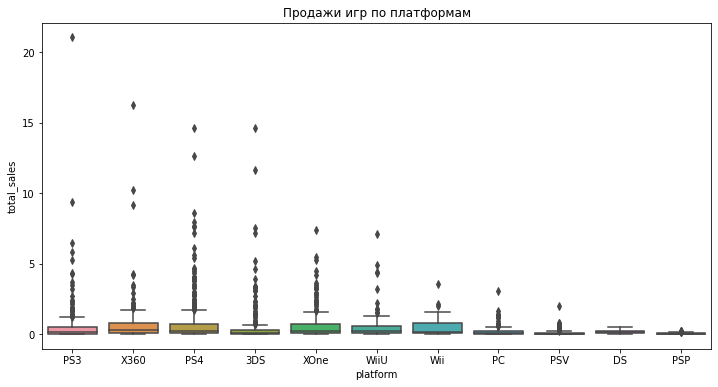

In [47]:
plt.figure(figsize=(12, 6))
plt.title('Продажи игр по платформам')
sns.boxplot(data=actual_data, x='platform', y='total_sales');

Для большей наглядности ограничим значения по оси y 

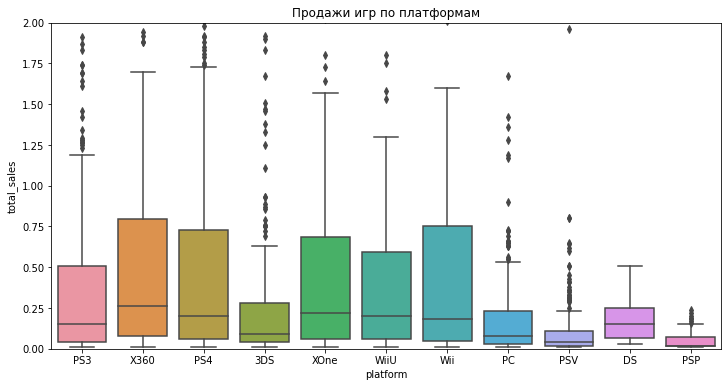

In [48]:
plt.figure(figsize=(12, 6))
plt.title('Продажи игр по платформам')
ax=sns.boxplot(data=actual_data, x='platform', y='total_sales')
ax.set_ylim(0, 2);

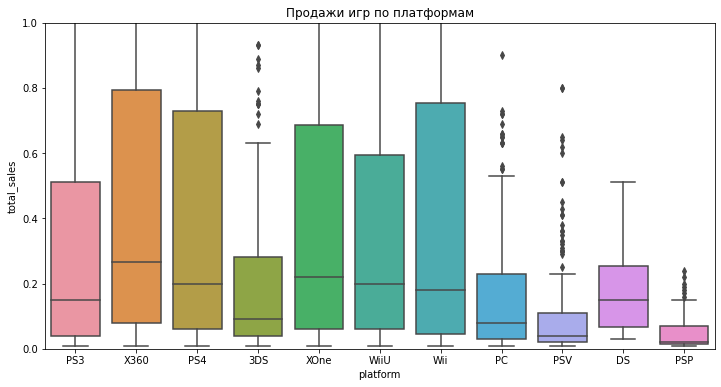

In [49]:
plt.figure(figsize=(12, 6))
plt.title('Продажи игр по платформам')
ax=sns.boxplot(data=actual_data, x='platform', y='total_sales')
ax.set_ylim(0, 1);

In [50]:
actual_data.groupby('platform')['total_sales'].describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
3DS,303.0,0.472772,1.381347,0.01,0.0400,0.090,0.2800,14.60
DS,8.0,0.192500,0.172026,0.03,0.0675,0.150,0.2525,0.51
PC,189.0,0.208624,0.352304,0.01,0.0300,0.080,0.2300,3.05
PS3,345.0,0.525884,1.451939,0.01,0.0400,0.150,0.5100,21.05
PS4,392.0,0.801378,1.609456,0.01,0.0600,0.200,0.7300,14.63
PSP,67.0,0.052239,0.059768,0.01,0.0150,0.020,0.0700,0.24
PSV,358.0,0.092151,0.153816,0.01,0.0200,0.040,0.1100,1.96
Wii,23.0,0.593913,0.915432,0.01,0.0450,0.180,0.7550,3.58
WiiU,115.0,0.562000,1.038778,0.01,0.0600,0.200,0.5950,7.09


На диаграмме можно выделить две категории платформ: 
- значение медианы около 0,2 и 75% квратилем около 0,7
- значение медианы ниже 0,1 и 75% квратилем ниже 0,3
При этом в обеих группах есть представители ТОП5 по объему продаж. Это объясняется наличием большого количества выбросов - игр с высокими объемами продаж. При 75% квартиле не выше 0,8 млн. продажи самых популярных игр достигают объема более 10 млн.шт. 

### Оценка влияния отзывов пользователей и критиков на объем продаж

На примере PS4 посмотрим, как отзывы критиков и пользователей влияют на продажи игр.

0.40656790206178095

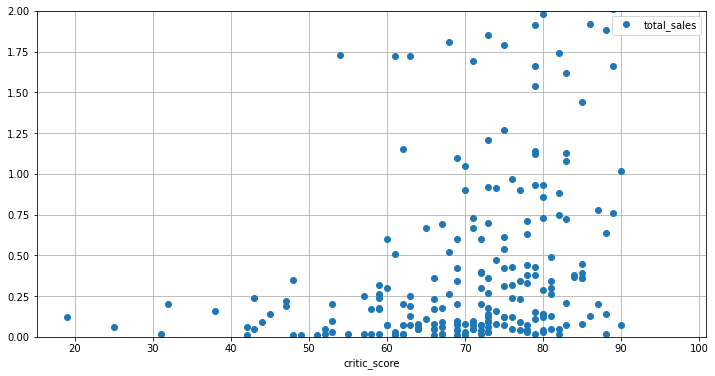

In [51]:
#построим диаграмму рассеивания и посчитаем коэффициент корреляции Пирсона
PS4 = games.query('platform=="PS4"')
PS4.plot(x='critic_score', y='total_sales',style='o',ylim=(0,2), grid=True, figsize=(12,6))
PS4['critic_score'].corr(PS4['total_sales'])

Полученный график рассеивания не отражает явной зависимости объема продаж от оценки критиков. Наблюдаются низкие продажи при низких рейтингах. Однако высокий рейтинг не дает гарантии большого объема продаж. 
Коэффициент корреляции 0,41 не подтверждает наличие линейной зависимости. 

-0.031957110204556376

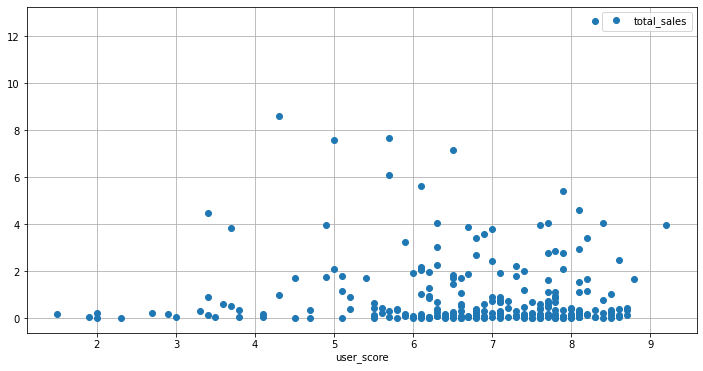

In [52]:
PS4.plot(x='user_score', y='total_sales',style='o', grid=True, figsize=(12,6))
PS4['user_score'].corr(PS4['total_sales'])

Очевидной зависимости объема продаж от оценок пользователей так же не наблюдается. Коэффециент корреляции близок к нулю и имеет отрицательный знак

Для сравнения построим диаграммы рассеяния для остальных платформ

0.4169983280084017

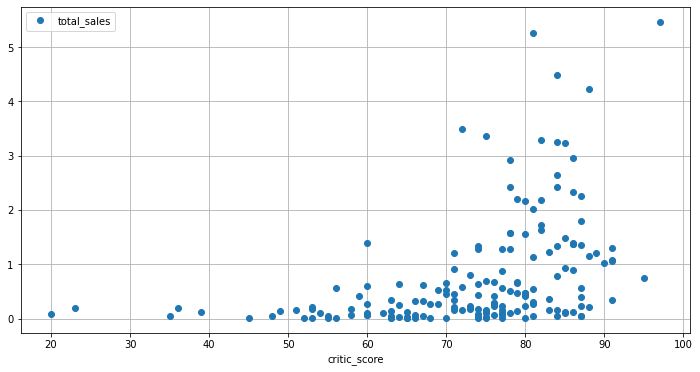

In [53]:
XOne = games.query('platform=="XOne"')
XOne.plot(x='critic_score', y='total_sales',style='o', grid=True, figsize=(12,6))
XOne['critic_score'].corr(XOne['total_sales'])

Здесь результат тот же. 

По платформе Wii нет данных по оценке критиков за выбранный период
По платформе DS нет данных по оценке критиков за выбранный период


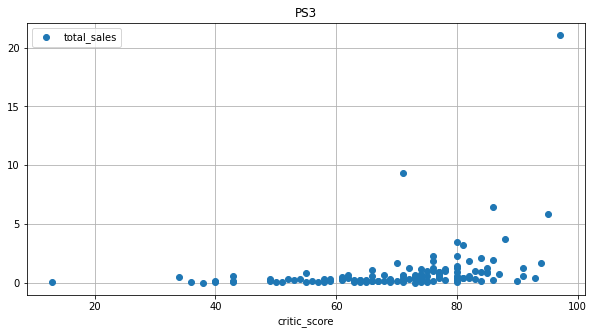

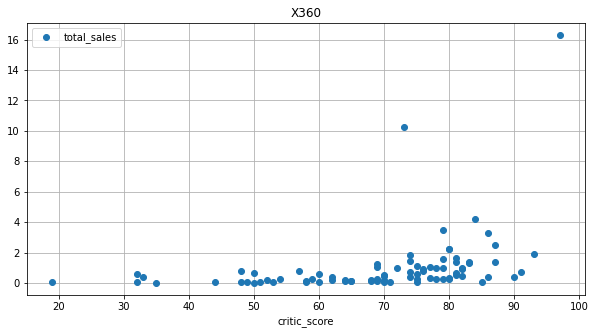

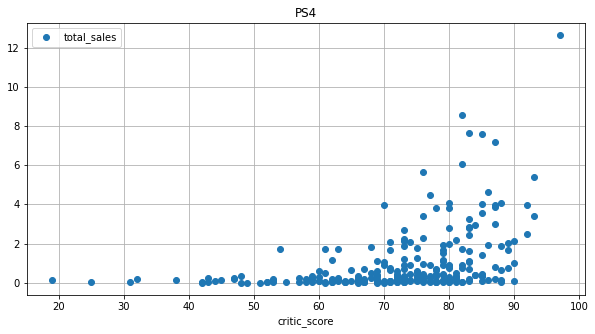

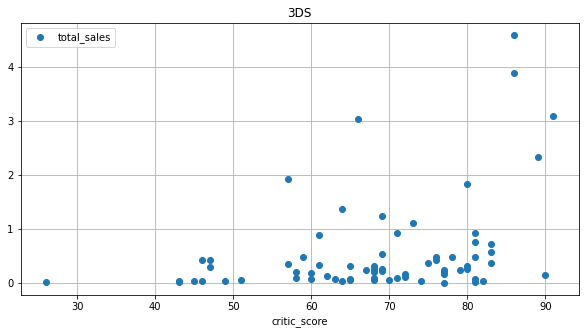

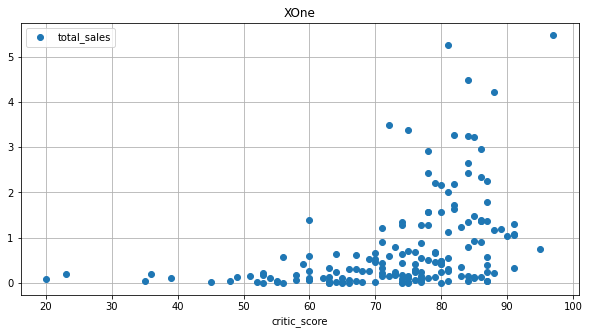

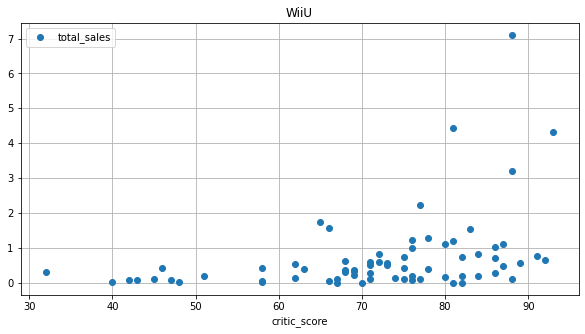

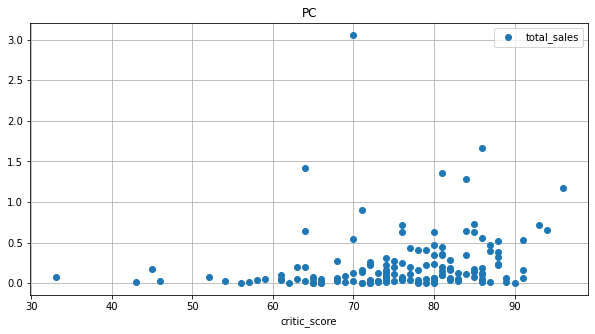

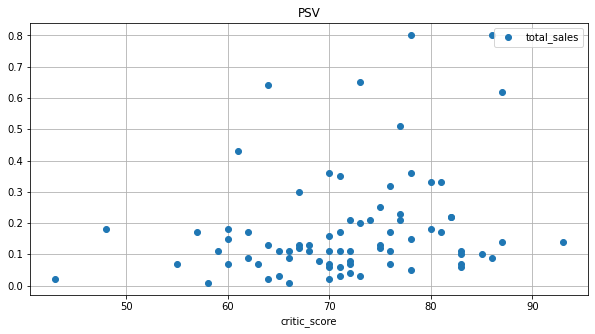

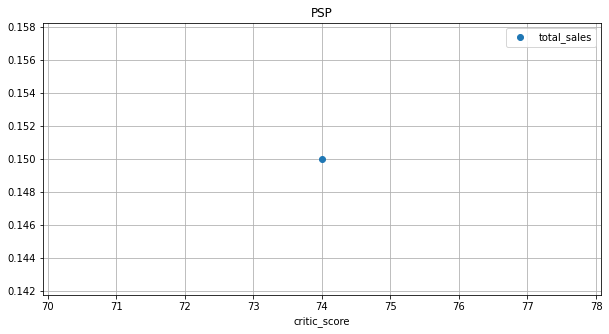

In [54]:
for platform_name in actual_data['platform'].unique():
    if actual_data.query('platform==@platform_name')['critic_score'].count()!=0:
        actual_data.query('platform==@platform_name').plot(x='critic_score', y='total_sales',style='o', grid=True, figsize=(10,5))
        plt.title(platform_name)
    else:
        print('По платформе',platform_name, 'нет данных по оценке критиков за выбранный период' )

Полученные графики рассеивания не отражают явной зависимости объема продаж игр от оценки критиков. Наблюдаются низкие продажи при низких рейтингах. Однако высокий рейтинг не дает гарантии большого объема продаж. 

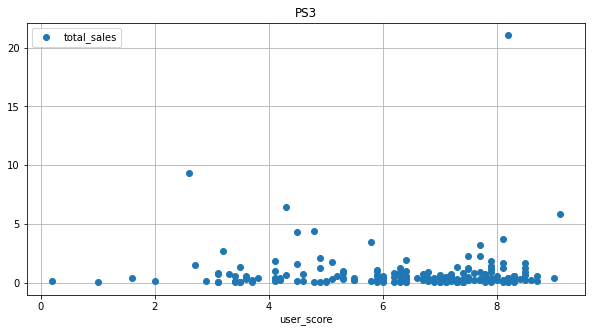

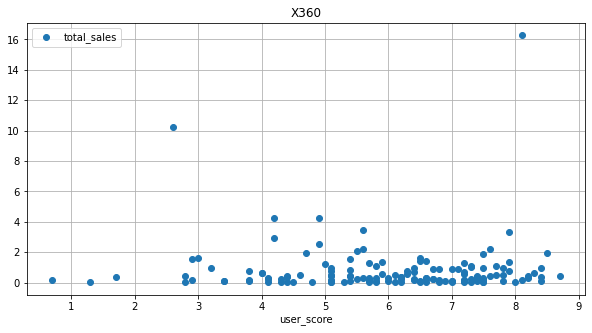

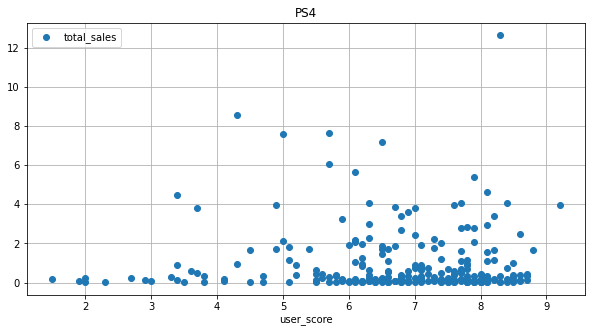

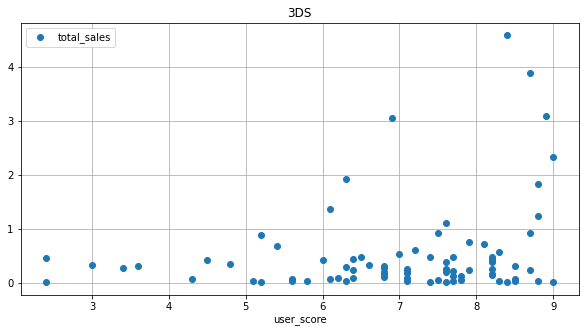

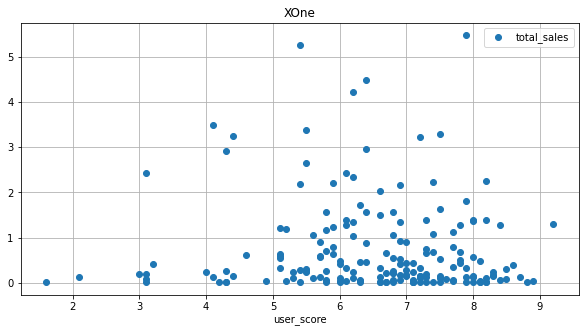

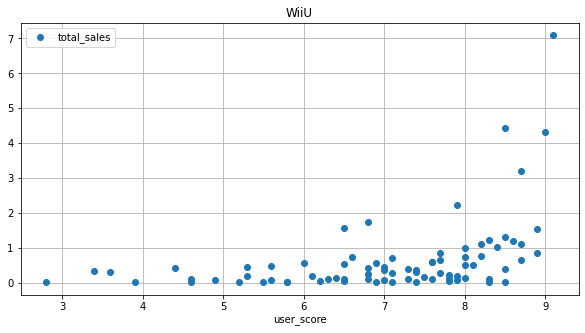

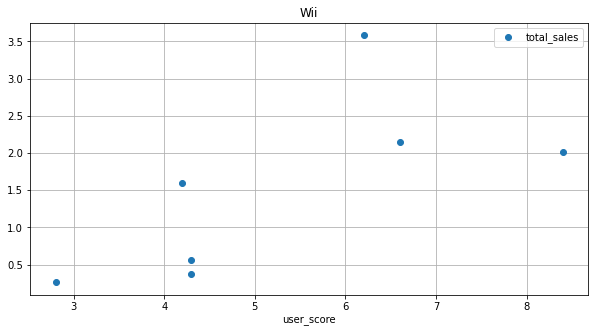

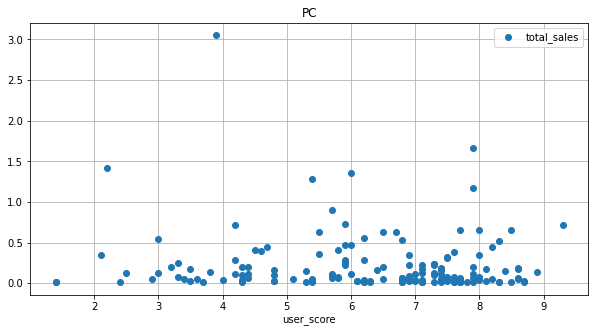

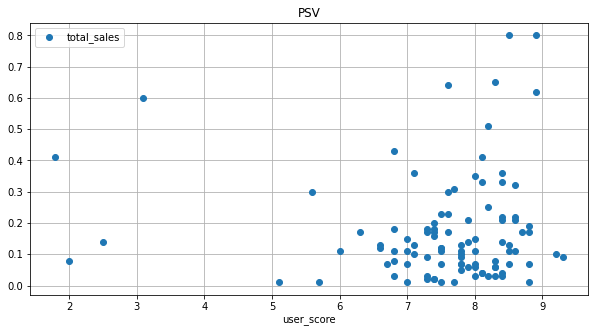

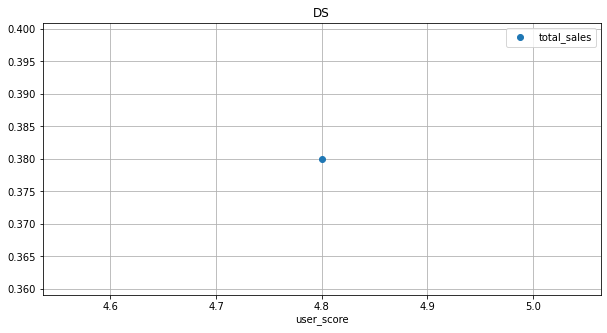

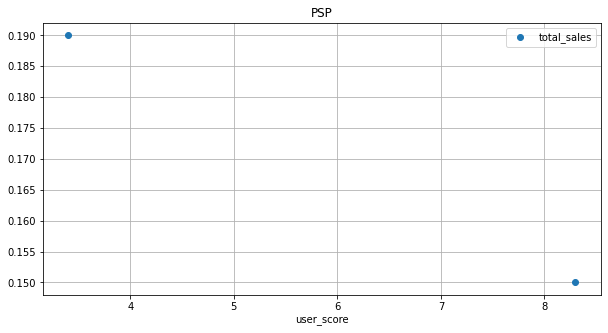

In [55]:
for platform_name in actual_data['platform'].unique():
    if actual_data.query('platform==@platform_name')['user_score'].count()!=0:
        actual_data.query('platform==@platform_name').plot(x='user_score', y='total_sales',style='o', grid=True, figsize=(10,5))
        plt.title(platform_name)
    else:
        print('По платформе',platform_name, 'нет данных по оценке пользователей за выбранный период' )

Полученные графики рассеивания не отражают явной зависимости объема продаж игр от оценки критиков. Даже при низких рейтингах есть игры с высокими объемам проадж. Высокие оценки также не дают гарантии большого объема продаж. 

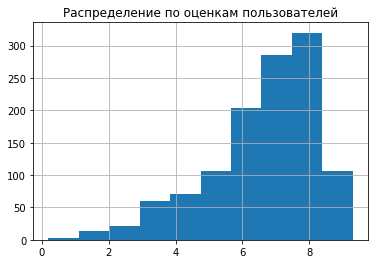

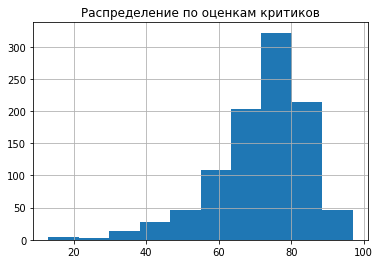

In [56]:
#посмотрим на разброс оценок критиков и пользователей за весь период
actual_data['user_score'].hist()
plt.title('Распределение по оценкам пользователей')
plt.show()
actual_data['critic_score'].hist()
plt.title('Распределение по оценкам критиков')
plt.show()

Большая часть игр имеет оценки выше 5 баллов у пользователей и 50 баллов у критиков. Средние значения составляют 6-7 и 65-75 баллов соответственно.

Средние оценки критиков и пользоватлей по платформам не имеют значительных колебаний. Явной зависимости от оценки критиков и пользователей не выявлено. Заметим, что при низких значениях оценки критиков объемы продаж игры низкие. Высокая оценка критиков не гарантирует высоких объемов продаж. 
При низких оценках пользователей, однако, есть случаи очень высоких объемов продаж. Так Call of Duty: Modern Warfare 3 имеет оценку пользователей менее 4 баллов и объем продаж при этом более 10 млн. шт. на обеих платформах. 
Имеет смысл посмотреть на распределение продаж по жанрам и возрастным категориям.

In [57]:
actual_data.query('user_score <= 4').groupby(['name','platform'])['total_sales'].sum().sort_values(ascending=False)

name                                 platform
Call of Duty: Ghosts                 X360        10.24
                                     PS3          9.36
Call of Duty: Infinite Warfare       PS4          4.47
Call of Duty: Ghosts                 PS4          3.83
The Sims 4                           PC           3.05
                                                 ...  
Rugby World Cup 2015                 PC           0.01
Super Dungeon Bros                   PS4          0.01
Prototype: Biohazard Bundle          PS4          0.01
Barbie and Her Sisters Puppy Rescue  WiiU         0.01
Prototype: Biohazard Bundle          XOne         0.01
Name: total_sales, Length: 104, dtype: float64

### Распределение игр по жанрам

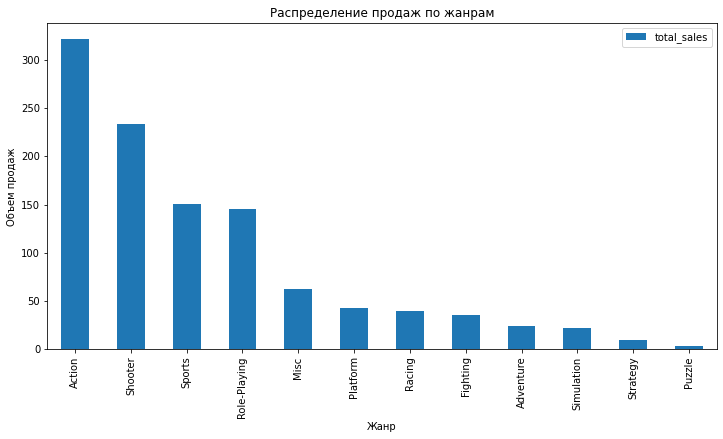

In [58]:
(
actual_data.pivot_table(index='genre', values='total_sales', aggfunc='sum')
.sort_values(by='total_sales',ascending=False).reset_index()
.plot(kind='bar', x='genre', y='total_sales', figsize=(12,6), xlabel='Жанр',ylabel='Объем продаж')
)
plt.title('Распределение продаж по жанрам');

Наиболее популярными и прибыльными оказались игры, относящиеся к жанрам Action, Shooter, Role-Playing, Sports.
Объем продаж этих игр за 2011-2016 гг. составил 75% от общего объема продаж  игр за эти годы.

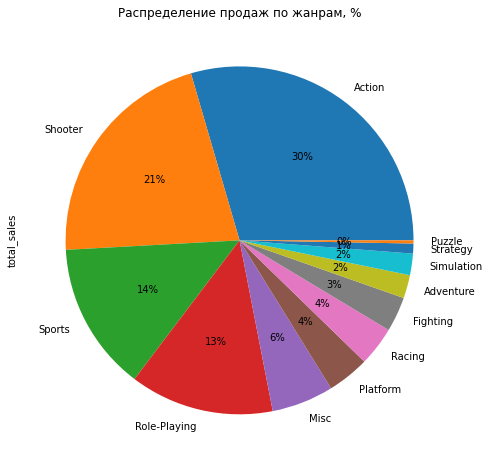

In [59]:
(
actual_data.pivot_table(index='genre', values='total_sales', aggfunc='sum')
.sort_values(by='total_sales', ascending=False)['total_sales']
.plot(kind='pie',autopct='%1.0f%%', title='Распределение продаж по жанрам, %', figsize=(8,8))
);

Рассмотрим медианные продажи

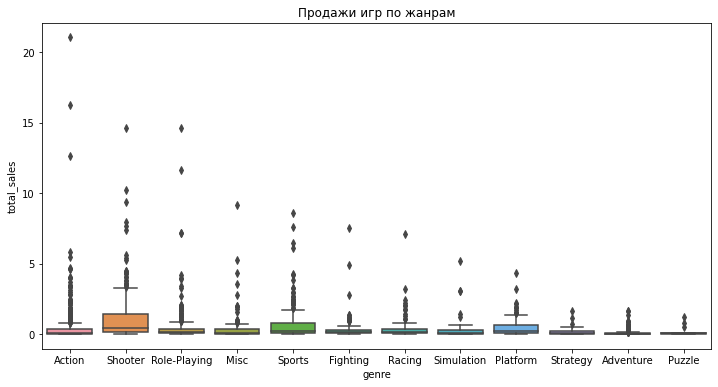

In [60]:
plt.figure(figsize=(12, 6))
plt.title('Продажи игр по жанрам')
ax=sns.boxplot(data=actual_data, x='genre', y='total_sales')
#ax.set_ylim(0, 1);

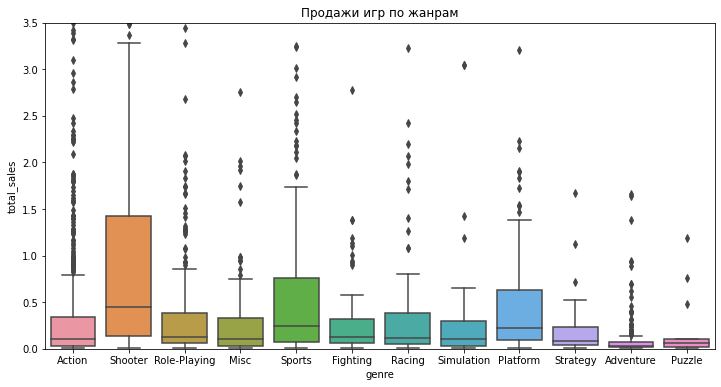

In [61]:
plt.figure(figsize=(12, 6))
plt.title('Продажи игр по жанрам')
ax=sns.boxplot(data=actual_data, x='genre', y='total_sales')
ax.set_ylim(0, 3.5);

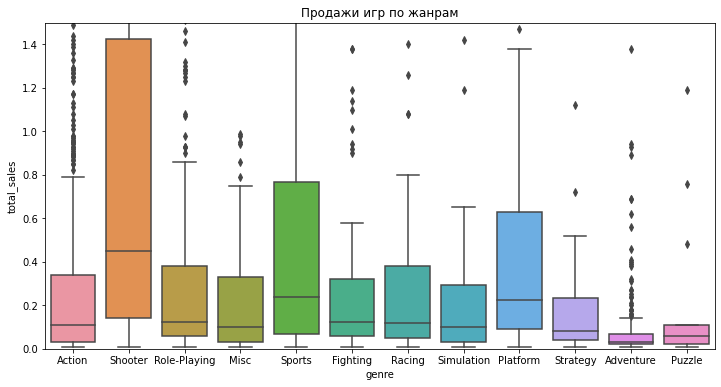

In [62]:
plt.figure(figsize=(12, 6))
plt.title('Продажи игр по жанрам')
ax=sns.boxplot(data=actual_data, x='genre', y='total_sales')
ax.set_ylim(0, 1.5);

Наибольший объем продаж в рассматриваемом периоде имели игры, относящиеся к жанрам Action, Shooter, Role-Playing, Sports. Объем продаж этих игр за 2013-2016 гг. составил 78% от общего объема продаж игр за эти годы. К самым непродаваемым жанрам можно отнести Fighting, Simulation, Adventure, Strategy, Puzzle. 
Диаграмма размаха показывает, что объем продаж Action игр вызван в большей степени высокими продажами отдельных игр, в то время как игры Shooter и Sports имеют более высокие медианные значения. 

## Портрет пользователя

### Анализ продаж по регионам

Посмотрим на объемы продаж за актуальный период в разрезе регионов

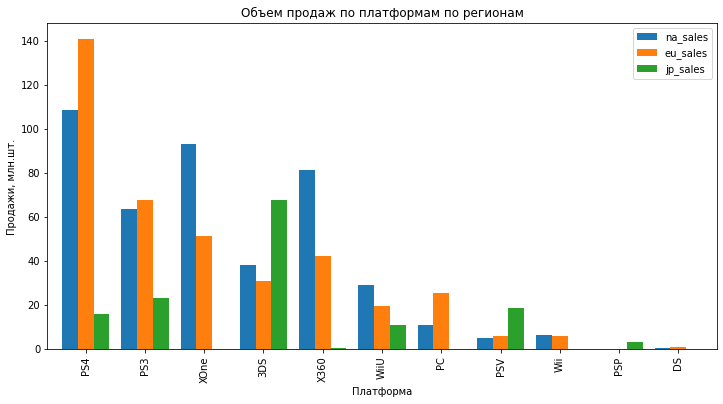

In [63]:
region_data = (
actual_data.pivot_table(index='platform', values=['na_sales','eu_sales','jp_sales','total_sales'], aggfunc='sum')
.sort_values(by='total_sales',ascending=False).reset_index()
)
region_data.plot(kind='bar', x='platform', y=['na_sales','eu_sales','jp_sales'], width=0.8, figsize=(12,6))
plt.title('Объем продаж по платформам по регионам')
plt.xlabel('Платформа')
plt.ylabel('Продажи, млн.шт.');

Лидерами продаж в Северной Америке и Европе являются платформы  PS4, XOne, PS3, X360. Однако самая популярная в Европе и Америке PS4 совсем не популярна в Японии. Наиболее популярной платформой Японии является 3DS.
Следует отметить, что, в целом, общий объем продаж в Японии значительно ниже, чем Северной Америке и Европе.

Рассмотрим каждый регион отдельно

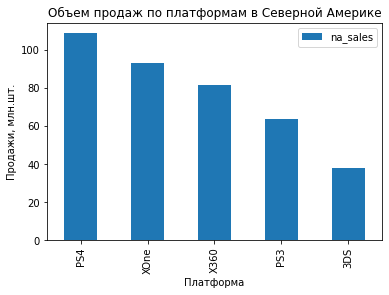

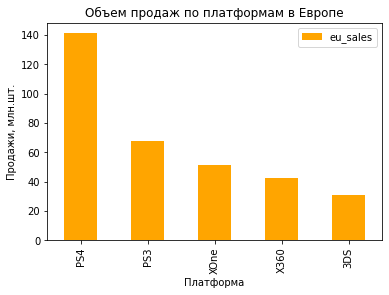

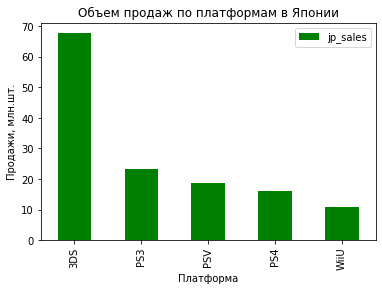

In [64]:
(
region_data.sort_values(by='na_sales',ascending=False).head()
.plot(kind='bar', x='platform', y='na_sales')
)
plt.title('Объем продаж по платформам в Северной Америке')
plt.xlabel('Платформа')
plt.ylabel('Продажи, млн.шт.');

(
region_data.sort_values(by='eu_sales',ascending=False).head()
.plot(kind='bar', x='platform', y='eu_sales', color='orange')
)
plt.title('Объем продаж по платформам в Европе')
plt.xlabel('Платформа')
plt.ylabel('Продажи, млн.шт.');
(
region_data.sort_values(by='jp_sales',ascending=False).head()
.plot(kind='bar', x='platform', y='jp_sales', color='green')
)
plt.title('Объем продаж по платформам в Японии')
plt.xlabel('Платформа')
plt.ylabel('Продажи, млн.шт.');

ТОП-5 лидерами продаж в Северной Америке за период 2013-2016 гг. являются платформы PS4, XOne, X360, PS3,  3DS.
В Европе лидируют PS4, PS3, XOne, X360, 3DS . 
Самой продаваемой платформой Японии оказалась 3DS, объем продаж которой в 3 раза больше ближайшей PS3. Далее идут PSV, PS4, WiiU.

### Жанры по регионам

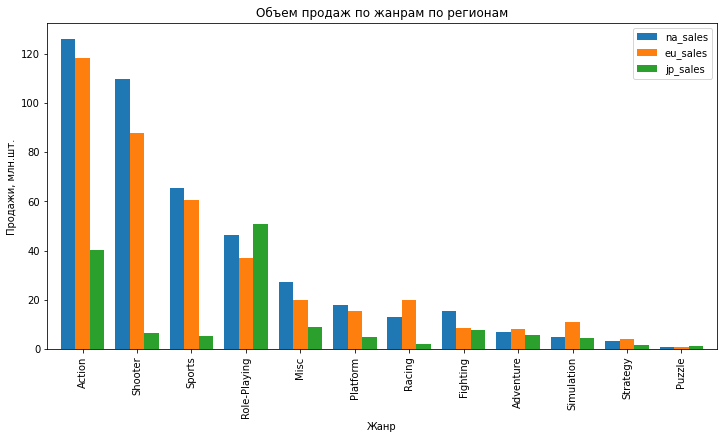

In [65]:
genre_data = (actual_data.pivot_table(index='genre', values=['na_sales','eu_sales','jp_sales','total_sales'], aggfunc='sum')
.sort_values(by='total_sales',ascending=False).reset_index())
genre_data.plot(kind='bar', x='genre', y=['na_sales','eu_sales','jp_sales'], width=0.8, figsize=(12,6))
plt.title('Объем продаж по жанрам по регионам')
plt.xlabel('Жанр')
plt.ylabel('Продажи, млн.шт.');

В Северной Америке и Европе больше всего популярны игры Action, Shooter И Sports. Приблизительно одинаковое распространение во всех трех регионах получили игры жанра Role-Playing. Посмотрим по каждому региону процентное соотношение разных жанров.

In [66]:
genre_data

,genre,eu_sales,jp_sales,na_sales,total_sales
0,Action,118.13,40.49,126.05,321.87
1,Shooter,87.86,6.61,109.74,232.98
2,Sports,60.52,5.41,65.27,150.65
3,Role-Playing,36.97,51.04,46.40,145.89
4,Misc,20.04,9.20,27.49,62.82
5,Platform,15.58,4.79,18.14,42.63
6,Racing,20.19,2.30,12.96,39.89
7,Fighting,8.55,7.65,15.55,35.31
8,Adventure,8.25,5.82,7.14,23.64
9,Simulation,10.92,4.52,4.86,21.76


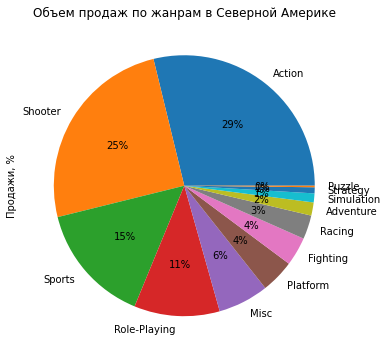

In [67]:
(
actual_data.groupby('genre')['na_sales'].sum()
.sort_values(ascending=False)
.plot(kind='pie', x='platform', y='na_sales',autopct='%1.0f%%', figsize=(6,6))
)
plt.title('Объем продаж по жанрам в Северной Америке')
plt.ylabel('Продажи, %');

ТОП-5 жанров компьютерных игр в Северной Америке составляют Action, Shooter, Sports, Role-Playing, Misc и составляют 86% от общего объема продаж по региону.

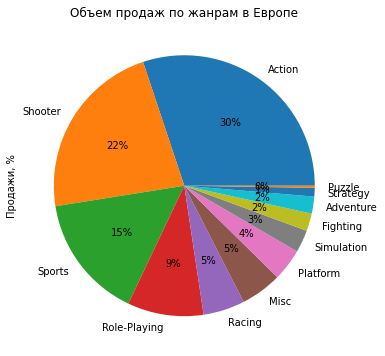

In [68]:
(
actual_data.groupby('genre')['eu_sales'].sum()
.sort_values(ascending=False)
.plot(kind='pie', x='platform', y='eu_sales',autopct='%1.0f%%', figsize=(6,6))
)
plt.title('Объем продаж по жанрам в Европе')
plt.ylabel('Продажи, %');

ТОП-5 жанров компьютерных игр Европы составляют Action, Shooter, Sports, Role-Playing, Racing и составляют 81% от общего объема продаж по региону. Заметим, что первые 4 жанра теже, что и в Северной Америке и их доли в общем объеме продаж по региону практически совпадают.

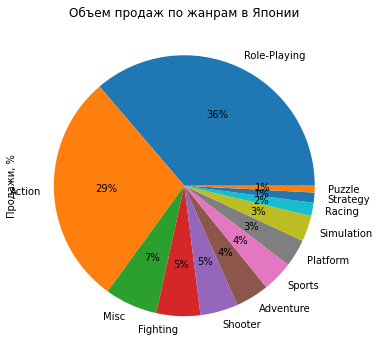

In [69]:
(
actual_data.groupby('genre')['jp_sales'].sum()
.sort_values(ascending=False)
.plot(kind='pie', x='platform', y='jp_sales',autopct='%1.0f%%', figsize=(6,6))
)
plt.title('Объем продаж по жанрам в Японии')
plt.ylabel('Продажи, %');

Как и в с лучае с платформами, популярность жанров игр в Японии отличается от двух других регионов. На первом месте тут стоит Role-Playing, потом Action. Эти два направления составляют 64% от общего количества продаж по региону. Далее идут Misc (7%).  Такое отличие от других регионов возможно объясняется тем, что большинство игр этого жанра были разработаны в Японии.

### Влияние рейтнга ESRB на продажи в отдельном регионе

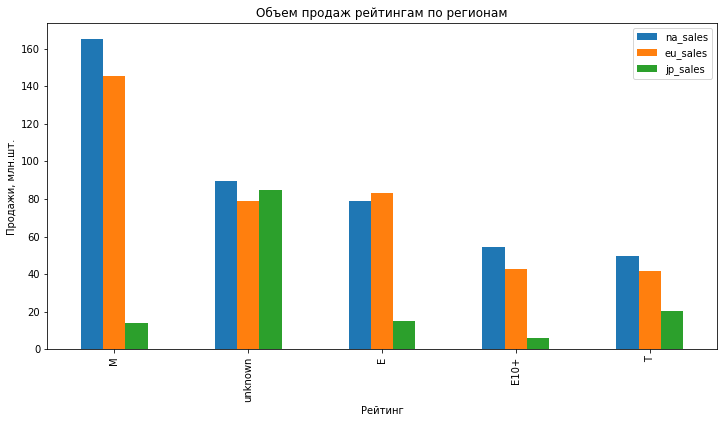

In [70]:
(
actual_data.pivot_table(index='rating', values=['na_sales','eu_sales','jp_sales'], aggfunc='sum').reset_index()
.sort_values(by='na_sales',ascending=False)
.plot(kind='bar', x='rating', y=['na_sales','eu_sales','jp_sales'], figsize=(12,6))
)
plt.title('Объем продаж рейтингам по регионам')
plt.xlabel('Рейтинг')
plt.ylabel('Продажи, млн.шт.');

В Северной Америке и Европе больше всего продаются игры категории M, E. Большая часть проданных в Японии игр не имеет данных о рейтинге, поэтому сложно судить о том, игры какой категории там продаются больше.

Итак, в Северной Америке наиболее популяны игры на платформах  PS4, XOne, X360, PS3, 3DS относящиеся к жанрам Action, Shooter, Sports, Role-Playing, Misc и возрастной категории М (17+) и в немного меньшей степени Е(для все возрастов),E10+(10+), T(13+).
Пользователи Европы не сильно отличаются от пользователей Северной Америки. Здесь популярны игры на платформах PS4, PS3, XOne, X360, 3DS, относящиеся к жанрам Action, Shooter, Sports, Role-Playing, Racing и той же возрастной категории М (17+) и Е (для все возрастов), E10+ (10+), T(13+). 
В Японии пользователи предпочитают в первую очередь игры на платформе 3DS. Далее идут PS3, PSV, PS4, WiiU. Среди жанров тут лидируют Role-Playing и Action. Эти два направления составляют 64% от общего количества продаж по региону. Далее Misc (7%). Остальные жанры составляют 5% и меньше от общего объема продаж.

## Проверка гипотез

### Гипотеза о равенстве пользовательских рейтингов для платформ PS4 и XOne

Проверим гипотезу о том, что средние пользовательские рейтинги платформ PS4 и XOne одинаковые.<br>
H0: средние пользовательские рейтинги платформ PS4 и XOne одинаковые;<br>
H1: средние пользовательские рейтинги платформ PS4 и XOne не равны.<br>
Уровень статистической значимости 5%.

In [71]:
alpha = 0.05
results = st.ttest_ind(PS4.query('user_score.isna()!=True')['user_score'], XOne.query('user_score.isna()!=True')['user_score']) 
print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу') 

p-значение: 0.10169342039498884
Не отвергаем нулевую гипотезу


Мы не можем отвергнуть нулевую гипотезу в сторону альтернативной гипотезы. Следовательно, предположение, что средние рейтинги платформ PS4 и XOne равны, можно считать верным.

In [72]:
print('Cредний рейтинг платформы PS4', PS4['user_score'].mean().round())
print('Cредний рейтинг платформы XOne', XOne['user_score'].mean().round())

Cредний рейтинг платформы PS4 7.0
Cредний рейтинг платформы XOne 7.0


### Проверка гипотезы о равенстве пользовательских рейтингов жанров Action и Sports 

Проверим гипотезу о том, что средние пользовательские рейтинги жанров Action и Sports разные.<br>
H0: средние пользовательские рейтинги жанров Action и Sports равны;<br>
H1: средние пользовательские рейтинги жанров Action и Sports не равны.<br>
Уровень статистической значимости 5%.

In [73]:
alpha = 0.05
results = st.ttest_ind(actual_data.query('genre=="Action" and user_score.isna()!=True')['user_score'], actual_data.query('genre=="Sports" and user_score.isna()!=True')['user_score']) 
print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу. Средние рейтинги жанров Action и Sports разные')
else:
    print('Не отвергаем нулевую гипотезу. Средние рейтинги жанров Action и Sports одинаковые ') 

p-значение: 1.0517832389140023e-27
Отвергаем нулевую гипотезу. Средние рейтинги жанров Action и Sports разные


Отвергаем нулевую гипотезу. Средние рейтинги жанров Action и Sports разные

In [74]:
print('Cредний рейтинг игр жанра Action', actual_data.query('genre=="Action"')['user_score'].mean().round())
print('Cредний рейтинг игр жанра Sports', actual_data.query('genre=="Sports"')['user_score'].mean().round())

Cредний рейтинг игр жанра Action 7.0
Cредний рейтинг игр жанра Sports 5.0


# Вывод

Исходные данные для проведения анализа продаж компьютерных игр содержали 16715 строк. В данных имелись пропущенные значения в столбцах 'Name', 'Year_of_Release','Genre','Critic_Score', 'User_Score', 'Rating'. <br>
В результате предварительной обработки данных было удалено 272 строки. Из них 269 по причине наличия пропусков в данных о годе выпуска игры, 2 - с неизвестным названием игры, 1- дубликат.<br>
Произведена замена неактуального рейтинга 'K-A' (использовался до 1998 г.) на его современный аналог рейтинг 'E'.<br>
Столбцы с данными по оценке пользователей и критиков содержат больше половины пропусков. Эти пропуски оставили как есть во избежании искажения данных. <br>

Данные о продажах представлены за период с 1980 по 2016 годы. Основная часть игр (75%) была выпущена после 2003 г. Больше всего выпущено игр 2008-2012 годах. Наблюдается новый рост количества выпущенных игр в 2016 году. <br>

Исходя из полученных данных можем предположить, что в 2017 году будут активно продаваться игры на платформах, которые появились с 2013 г.<br> 

Лидерами продаж за период с 2013 по 2016 гг. являются PS4, PS3, XOne, 3DS, X360.<br>
Наиболее перспективными являются платформы PS4, приходящая на смену популярной PS3, и XOne, которая заменит X360. Обе платформы 2013 года выпуска. Это самые молодые платформы с наибольшим объемом продаж и перспективой остаться на рынке в ТОПе еще 2-3 года. Остальные платформы присутствуют на рынке более 5 лет и имеют тенденцию к падению продаж.<br>
Анализ продаж игр на платформах PS4 и XOne показал наличие выбросов при значении более 5 млн.шт. Данные выбросы обусловлены высокими продажами ряда игр. Наибольшей популярностью на обеих платформах обладают игры Call of Duty: Black Ops 3, Grand Theft Auto V, Call of Duty: Advanced Warfare. Однако, PS4 превосходит XOne по объему продаж.<br>
Анализ продаж игр по жанрам показал, что наиболее популярными и прибыльными оказались игры, относящиеся к жанрам Action, Shooter, Role-Playing, Sports. Объем продаж этих игр за 2013-2016 гг. составил 78% от общего объема продаж игр за эти годы.<br>
К самым непродаваемым жанрам можно отнести Fighting, Simulation, Adventure, Strategy, Puzzle.<br>
Диаграмма размаха показывает, что объем продаж Action игр вызван в большей степени высокими продажами отдельных игр, в то время как игры Shooter и Sports имеют более высокие медианные значения.<br>

Анализ влияния оценок пользователей и критиков не показал наличия явной зависимости объема продаж от оценки критиков и оценки пользователей. В целом наблюдаются низкие продажи при низких рейтингах, но есть и исключения.  Так, Call of Duty: Modern Warfare 3 имеет оценку пользователей менее 4 баллов и объем продаж при этом более 10 млн. шт. на обеих платформах. Однако высокий рейтинг не дает гарантии большого объема продаж. <br>

Анализ продаж игр в Северной Америке, Европе и Японии показал, что в Северной Америке наиболее популярны игры на платформах  PS4, XOne, X360, PS3, 3DS относящиеся к жанрам Action, Shooter, Sports, Role-Playing, Misc и возрастной категории М (17+) и в немного меньшей степени Е(для все возрастов),E10+(10+), T(13+).<br>

Пользователи Европы не сильно отличаются от пользователей Северной Америки. Здесь популярны игры на платформах PS3, PS4, X360, 3DS и PC, относящиеся к жанрам Action, Shooter, Sports, Role-Playing, Racing и той же возрастной категории М (17+) и Е (для всех возрастов), E10+ (10+), T(13+). <br>

В Японии пользователи предпочитают в первую очередь игры на платформе 3DS. Далее идут PS3, PSV, PS4, WiiU. Среди жанров тут лидируют Role-Playing и Action. Эти два направления составляют 64% от общего количества продаж по региону. Остальные жанры составляют 5% и меньше от общего объема продаж.
<br>

В процессе анализа для выбранных платформ были проверены две гипотезы:<br> 

Гипотеза о равенстве пользовательских рейтингов для платформ PS4 и XOne не была отвергнута. Предположение, что средние рейтинги платформ PS4 и XOne равны, можно считать верным.<br>
Cредний рейтинг платформы PS4 7.0<br>
Cредний рейтинг платформы XOne 7.0<br>

Гипотеза о различии средних пользовательских рейтингов у игр жанров Action и Sports не была отвергнута. <br>
Cредний рейтинг игр жанра Action 7.0<br>
Cредний рейтинг игр жанра Sports 6.0<br>

Таким образом, проведенный анализ показал, что наиболее перспективными платформами для продаж в 2017 году являются PS4 и XOne. Эти платформы популярны в большей степени в Северной Америке и Европе. Наибольшую популярность имеют игры из жанра Shooter, Action, Sports.  М (17+) и Е(для все возрастов), E10+ (10+), T(13+).